<a href="https://colab.research.google.com/github/zainaaazz/GoogleColabCodeExperiments/blob/main/DataSet_DataDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

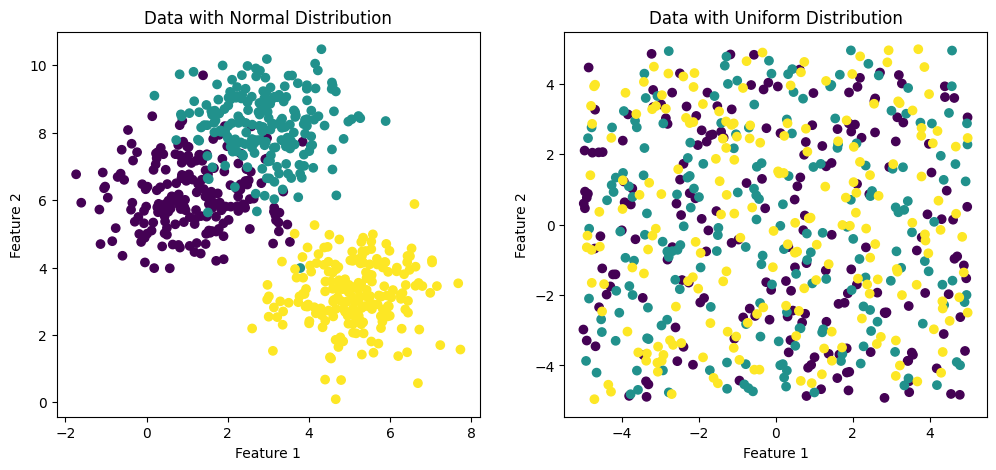

Accuracy for Normal Distribution: 0.03
Accuracy for Uniform Distribution: 0.31666666666666665


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to generate multi-dimensional data with multiple classes
def generate_multi_class_data(n_classes, n_features, n_samples_per_class, std_dev):
    # Generate class centers
    class_centers = np.random.rand(n_classes, n_features) * 10

    # Generate data points for each class
    X = []
    y = []
    for i in range(n_classes):
        class_samples = np.random.normal(class_centers[i], std_dev, (n_samples_per_class, n_features))
        X.extend(class_samples)
        y.extend([i] * n_samples_per_class)

    return np.array(X), np.array(y)

# Generate data with 3 classes and 3 features
n_classes = 3
n_features = 3
n_samples_per_class = 200
std_dev = 1.0

# Generate data with normal distribution
X_normal, y_normal = generate_multi_class_data(n_classes, n_features, n_samples_per_class, std_dev)

# Generate data with uniform distribution
X_uniform, y_uniform = generate_multi_class_data(n_classes, n_features, n_samples_per_class, std_dev)
X_uniform = np.random.uniform(-5, 5, (n_classes * n_samples_per_class, n_features))

# Visualize the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the data with normal distribution
ax1.scatter(X_normal[:, 0], X_normal[:, 1], c=y_normal)
ax1.set_title("Data with Normal Distribution")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

# Plot the data with uniform distribution
ax2.scatter(X_uniform[:, 0], X_uniform[:, 1], c=y_uniform)
ax2.set_title("Data with Uniform Distribution")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")

plt.show()

# Cluster the data using KMeans
kmeans_normal = KMeans(n_clusters=n_classes)
kmeans_normal.fit(X_normal)
kmeans_labels_normal = kmeans_normal.labels_

kmeans_uniform = KMeans(n_clusters=n_classes)
kmeans_uniform.fit(X_uniform)
kmeans_labels_uniform = kmeans_uniform.labels_

# Calculate accuracy for normal distribution
accuracy_normal = np.sum(kmeans_labels_normal == y_normal) / len(y_normal)
print("Accuracy for Normal Distribution:", accuracy_normal)

# Calculate accuracy for uniform distribution
accuracy_uniform = np.sum(kmeans_labels_uniform == y_uniform) / len(y_uniform)
print("Accuracy for Uniform Distribution:", accuracy_uniform)